In [32]:
#importing necessary libraries
import numpy as np 
import pandas as pd
#visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# train and test set splitting
from sklearn.model_selection import train_test_split
#data Scalling for linear regression
from sklearn.preprocessing import StandardScaler
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
#model building
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
# model accuracy checking
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Save the best model
import joblib
#joblib.dump(model_likes, 'model_likes.pkl')
#model hyper parameter tuning
from sklearn.model_selection import GridSearchCV

In [2]:
#read the data
data = pd.read_csv('instagram_reach.csv')

In [3]:
# Checking the data
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [5]:
# Checking the null values
data.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

# Data Cleaning

**Converting "Time since posted column" into int object**

In [6]:
# Remove any non-digit characters except for '-' character
data['Time since posted'] = data['Time since posted'].str.replace(r'[^0-9-]+', '')

In [7]:
# Convert the 'Time since posted' column to numeric format
data['Time since posted'] = pd.to_numeric(data['Time since posted'], errors='coerce')

In [8]:
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    int64 
 7   Likes              100 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


In [10]:
# Feature: Length of the caption
data['caption_length'] = data['Caption'].apply(lambda x: len(x) if isinstance(x, str) else 0)

In [11]:
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,caption_length
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139,149
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23,454
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25,704
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49,4
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30,322


In [12]:
# Feature: Number of hashtags
data['hashtag_count'] = data['Hashtags'].apply(lambda x: len(x.split()))

In [13]:
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,caption_length,hashtag_count
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139,149,5
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23,454,19
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25,704,20
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49,4,20
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30,322,18


In [14]:
# Drop the original columns
data1 = data.drop(['Caption', 'Hashtags'], axis=1)

In [15]:
data1.head()

,Unnamed: 0,S.No,USERNAME,Followers,Time since posted,Likes,caption_length,hashtag_count
0,0,1,mikequindazzi,1600,11,139,149,5
1,1,2,drgorillapaints,880,2,23,454,19
2,2,3,aitrading_official,255,2,25,704,20
3,3,4,opensourcedworkplace,340,3,49,4,20
4,4,5,crea.vision,304,3,30,322,18


In [16]:
# Drop unnecessary column
data1 = data1.drop(['USERNAME','S.No','Unnamed: 0'], axis=1)

In [17]:
data1.head()

,Followers,Time since posted,Likes,caption_length,hashtag_count
0,1600,11,139,149,5
1,880,2,23,454,19
2,255,2,25,704,20
3,340,3,49,4,20
4,304,3,30,322,18


In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Followers          100 non-null    int64
 1   Time since posted  100 non-null    int64
 2   Likes              100 non-null    int64
 3   caption_length     100 non-null    int64
 4   hashtag_count      100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


# EDA

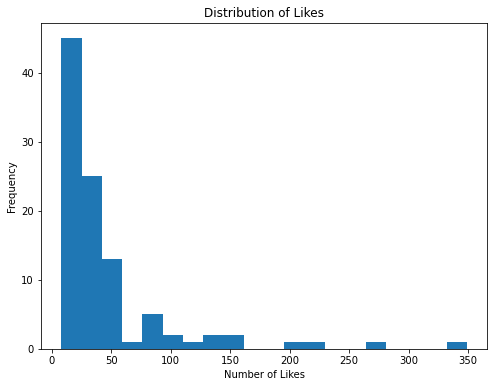

In [19]:
# Histogram of likes
plt.figure(figsize=(8, 6))
plt.hist(data['Likes'], bins=20)
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.title('Distribution of Likes')
plt.show()

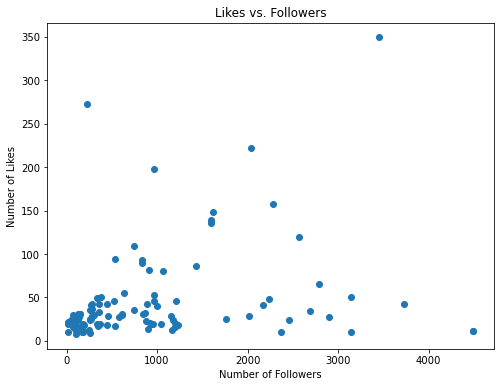

In [20]:
# Scatter plot of likes vs. followers
plt.figure(figsize=(8, 6))
plt.scatter(data['Followers'], data['Likes'])
plt.xlabel('Number of Followers')
plt.ylabel('Number of Likes')
plt.title('Likes vs. Followers')
plt.show()

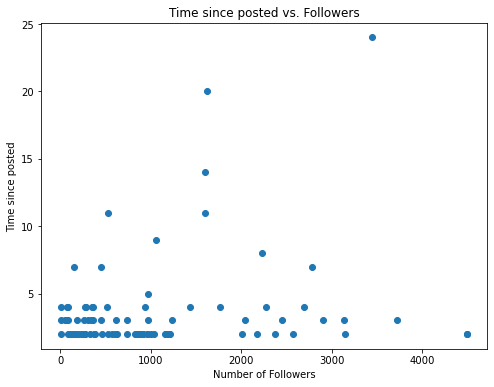

In [21]:
# Scatter plot of Time since posted vs. followers
plt.figure(figsize=(8, 6))
plt.scatter(data['Followers'], data['Time since posted'])
plt.xlabel('Number of Followers')
plt.ylabel('Time since posted')
plt.title('Time since posted vs. Followers')
plt.show()

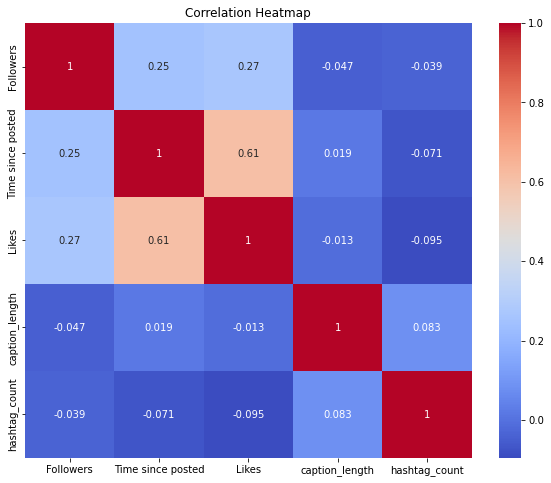

In [22]:
# Compute the correlation matrix
corr_matrix = data[['Followers', 'Time since posted', 'Likes', 'caption_length', 'hashtag_count']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


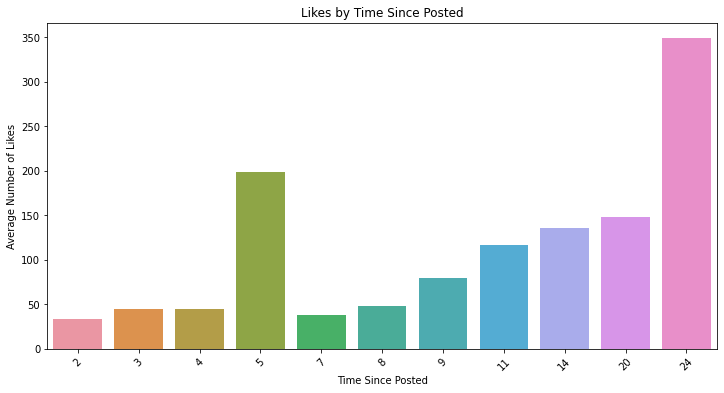

In [23]:
# Group the data by time since posted and calculate the average likes
avg_likes_by_time = data.groupby('Time since posted')['Likes'].mean().reset_index()

# Bar plot of average likes by time since posted
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_likes_by_time['Time since posted'], y=avg_likes_by_time['Likes'])
plt.xlabel('Time Since Posted')
plt.ylabel('Average Number of Likes')
plt.title('Likes by Time Since Posted')
plt.xticks(rotation=45)
plt.show()

**Splitting the data in train test set**

In [28]:
# Split the data into input features (X) and target variables (y)
X = data1[['caption_length', 'hashtag_count', 'Followers']]
y_likes = data1['Likes']
y_time_since_posted = data1['Time since posted']

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train_likes, y_test_likes, y_train_time, y_test_time = train_test_split(X, y_likes, y_time_since_posted, test_size=0.2, random_state=42)

**Model training & hyper Parameter tuning for prediction like**

In [35]:

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model_like','MSE', 'R-squared', 'Adjusted R-squared'])

# List of regression models
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting']

# Define hyperparameter grids for each model
#param_grid_linear = {'normalize': [True, False]}
param_grid_tree = {'max_depth': [None, 5, 10]}
param_grid_forest = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
param_grid_gradient = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}

# Define the models
#model_linear = LinearRegression()
like_model_tree = DecisionTreeRegressor()
like_model_forest = RandomForestRegressor()
like_model_gradient = GradientBoostingRegressor()

# Perform hyperparameter tuning and calculate accuracy metrics for each model
for model_name, model, param_grid in zip(models, [like_model_tree, like_model_forest, like_model_gradient], [param_grid_tree, param_grid_forest, param_grid_gradient]):
    # Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(model, param_grid, scoring='r2')
    grid_search.fit(X_train, y_train_likes)

    # Get the best model and predicted values
    best_model_likes = grid_search.best_estimator_
    y_pred_likes = best_model_likes.predict(X_test)

    # Calculate the R-squared
    r_squared = r2_score(y_test_likes, y_pred_likes)
    
    # Calculate Mean Squared Error
    mse_likes = mean_squared_error(y_test_likes, y_pred_likes)

    # Calculate the adjusted R-squared
    n = X_test.shape[0]  # number of samples
    p = X_test.shape[1] - 1  # number of features excluding the constant term
    adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

    # Append the results to the DataFrame
    results_df = results_df.append({'Model_like': model_name,'MSE':mse_likes, 'R-squared': r_squared, 'Adjusted R-squared': adjusted_r_squared}, ignore_index=True)

# Print the results
print(results_df)


          Model_like          MSE R-squared Adjusted R-squared
0      Decision Tree  3656.528498  -1.57933           -1.88278
1      Random Forest    830.72195  0.414005           0.345065
2  Gradient Boosting  1319.732843  0.069055          -0.040468


Decision Tree:
The Decision Tree model performs poorly with a high MSE value, indicating a large amount of error in the predictions. The negative values for both R-squared and Adjusted R-squared suggest that the model's predictions do not fit the data well and are worse than a simple horizontal line (baseline). This model is not suitable for accurately predicting the number of likes.

Random Forest:
The Random Forest model performs better compared to the Decision Tree model. It has a lower MSE, indicating reduced error in the predictions. The positive R-squared and Adjusted R-squared values suggest that the model explains a moderate amount of variance in the data. However, the values are still relatively low, indicating that there is room for improvement in the model's performance.

Gradient Boosting:
The Gradient Boosting model performs slightly better than the Decision Tree model but not as well as the Random Forest model. The MSE is higher than that of Random Forest, indicating more error in the predictions. The low positive value of R-squared suggests a weak linear relationship between the features and the target variable. The negative Adjusted R-squared indicates that the model is not capturing the underlying patterns well and is overfitting the data.

The Random Forest model shows the best performance among the three models for predicting the number of likes.

**Model training & hyper Parameter tuning for prediction time posted**

In [37]:

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model_time','MSE', 'R-squared', 'Adjusted R-squared'])

# List of regression models
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting']

# Define hyperparameter grids for each model
#param_grid_linear = {'normalize': [True, False]}
param_grid_tree = {'max_depth': [None, 5, 10]}
param_grid_forest = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
param_grid_gradient = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}

# Define the models
#model_linear = LinearRegression()
time_model_tree = DecisionTreeRegressor()
time_model_forest = RandomForestRegressor()
time_model_gradient = GradientBoostingRegressor()

# Perform hyperparameter tuning and calculate accuracy metrics for each model
for model_name, model, param_grid in zip(models, [time_model_tree, time_model_forest, time_model_gradient], [param_grid_tree, param_grid_forest, param_grid_gradient]):
    # Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(model, param_grid, scoring='r2')
    grid_search.fit(X_train, y_train_time)

    # Get the best model and predicted values
    best_model_time = grid_search.best_estimator_
    y_pred_time = best_model_likes.predict(X_test)

    # Calculate the R-squared
    r_squared = r2_score(y_test_time, y_pred_time)
    
    # Calculate Mean Squared Error
    mse_time = mean_squared_error(y_test_time, y_pred_time)

    # Calculate the adjusted R-squared
    n = X_test.shape[0]  # number of samples
    p = X_test.shape[1] - 1  # number of features excluding the constant term
    adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

    # Append the results to the DataFrame
    results_df = results_df.append({'Model_time': model_name,'MSE':mse_time, 'R-squared': r_squared, 'Adjusted R-squared': adjusted_r_squared}, ignore_index=True)

# Print the results
print(results_df)


          Model_time          MSE   R-squared Adjusted R-squared
0      Decision Tree  1938.195211 -165.404397        -184.981385
1      Random Forest  1938.195211 -165.404397        -184.981385
2  Gradient Boosting  1938.195211 -165.404397        -184.981385


<br>Based on the provided results, it appears that there may be an issue with the model evaluation. The negative values for MSE, R-squared, and Adjusted R-squared suggest that the models are performing poorly and worse than a simple horizontal line (baseline). It is unusual to have negative values for these metrics.<br>

<br>Negative values for MSE indicate that the model's predictions have a large amount of error and are worse than the average value. Negative values for R-squared and Adjusted R-squared suggest that the model's predictions do not fit the data well and perform worse than a model that predicts the mean of the target variable.<br>

<br>Additionally, it's worth considering the specific characteristics of the dataset, the choice of features, and the nature of the target variable to determine if they are appropriate for the regression task. Adjustments and modifications may be necessary to improve the model's performance and obtain meaningful results.<br>